<a href="https://colab.research.google.com/github/naveensinghcr21/Image-Detection/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('1nEW4G7NN2O43uunOJB9TBygqIHroLjlG')

     |████████████████████████████████| 71kB 3.6MB/s 


# us-accidents-analysis

Use the "Run" button to execute the code.

#US Accidents Exploratory Data Analysis

TODO-Talk about EDA

TODO- Talk about the DataSet(Source,What it contains,How is it useful)
*   Kaggle
*   Information about Accidents
*   can be useful to prevent Accidents









##Data Preparation and Cleaning


1.   Load the file using pandas
2.   Look at some of the information about the data and the columns
3.   fix any missing or incorrect values






In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec20_Updated1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2.0,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2.0,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2.0,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2.0,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3.0,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914297,A-1914298,2.0,2020-11-21 01:47:52,2020-11-21 03:29:06,38.950985,-77.349189,38.953105,-77.360149,0.607,Incident on DULLES TOLL RD near DULLES TOLL RD...,NaN,Dulles Toll Rd,R,Reston,Fairfax County,VA,20190,US,US/Eastern,KIAD,2020-11-21 01:52:00,43.0,43.0,76.0,29.98,10.0,CALM,0.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1914298,A-1914299,2.0,2020-01-31 16:38:00,2020-01-31 17:37:00,41.066780,-111.969950,41.066780,-111.969950,0.000,At UT-232/Exit 331 - Accident.,NaN,I-15 N,R,Layton,Davis,UT,84041,US,US/Mountain,KHIF,2020-01-31 16:58:00,37.0,37.0,59.0,25.54,10.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1914299,A-1914300,2.0,2018-05-08 12:17:02,2018-05-08 18:17:02,34.227380,-118.410620,34.229260,-118.409840,0.137,At Sheldon St - Accident.,NaN,Hollywood Fwy N,R,Sun Valley,Los Angeles,CA,91352,US,US/Pacific,KBUR,2018-05-08 11:53:00,75.0,NaN,50.0,29.98,9.0,SE,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1914300,A-1914301,2.0,2020-11-12 17:44:19,2020-11-12 19:02:33,37.601169,-77.419313,37.602609,-77.423563,0.253,Incident on AZALEA AVE near CAROLINA AVE Drive...,198.0,E Azalea Ave,R,Richmond,Henrico,VA,23222,US,US/Eastern,KRIC,2020-11-12 17:54:00,54.0,54.0,93.0,29.80,10.0,N,10.0,0.0,Mos

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397342 entries, 0 to 397341
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     397342 non-null  object 
 1   Severity               397342 non-null  int64  
 2   Start_Time             397342 non-null  object 
 3   End_Time               397342 non-null  object 
 4   Start_Lat              397342 non-null  float64
 5   Start_Lng              397342 non-null  float64
 6   End_Lat                358671 non-null  float64
 7   End_Lng                358671 non-null  float64
 8   Distance(mi)           397342 non-null  float64
 9   Description            397342 non-null  object 
 10  Number                 139271 non-null  float64
 11  Street                 397342 non-null  object 
 12  Side                   397342 non-null  object 
 13  City                   397329 non-null  object 
 14  County                 397342 non-nu

to get the descriptions of all those numerical columns

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.387922e+06,1.387922e+06,1.387922e+06,1.252807e+06,1.252807e+06,1.387922e+06,485096.000000,1.355897e+06,822727.000000,1.353968e+06,1.360781e+06,1.353620e+06,1.241140e+06,766825.000000
mean,2.288839e+00,3.653178e+01,-9.643333e+01,3.651849e+01,-9.621217e+01,3.978089e-01,6775.428921,6.099036e+01,55.012757,6.539734e+01,2.965748e+01,9.115497e+00,7.822450e+00,0.011186
std,5.539827e-01,5.014887e+00,1.775589e+01,5.017293e+00,1.766129e+01,1.595443e+00,13612.262500,1.844649e+01,22.195492,2.287610e+01,9.067318e-01,2.841615e+00,5.495396e+00,0.149882
min,1.000000e+00,2.456025e+01,-1.244974e+02,2.456025e+01,-1.244974e+02,0.000000e+00,0.000000,-8.900000e+01,-89.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+00,3.366355e+01,-1.178239e+02,3.364438e+01,-1.177066e+02,0.000000e+00,967.000000,4.890000e+01,39.000000,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.000000e+00,3.610204e+01,-9.116690e+01,3.605976e+01,-9.105398e+01,0.000000e+00,3094.000000,6.300000e+01,58.000000,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000
75%,3.000000e+00,4.037882e+01,-8.085950e+01,4.033523e+01,-8.084774e+01,2.800000e-01,7996.000000,7.500000e+01,72.000000,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.900220e+01,-6.710924e+01,2.512200e+02,990415.000000,2.030000e+02,174.000000,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,10.180000


to count number of numeric columns:


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

In [ ]:
newdf #new dataframe with columns containing only numeric values.

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2.0,34.808868,-82.269157,34.808868,-82.269157,0.000,439.0,76.0,76.0,52.0,28.91,10.0,7.0,0.0
1,2.0,35.090080,-80.745560,35.090080,-80.745560,0.000,3299.0,76.0,76.0,62.0,29.30,10.0,3.0,0.0
2,2.0,37.145730,-121.985052,37.165850,-121.988062,1.400,NaN,51.0,51.0,80.0,30.17,10.0,6.0,0.0
3,2.0,39.110390,-119.773781,39.110390,-119.773781,0.000,NaN,53.6,NaN,16.0,30.16,10.0,4.6,NaN
4,3.0,26.102942,-80.265091,26.102942,-80.265091,0.000,NaN,84.2,NaN,84.0,29.92,10.0,13.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914297,2.0,38.950985,-77.349189,38.953105,-77.360149,0.607,NaN,43.0,43.0,76.0,29.98,10.0,0.0,0.0
1914298,2.0,41.066780,-111.969950,41.066780,-111.969950,0.000,NaN,37.0,37.0,59.0,25.54,10.0,0.0,0.0
1914299,2.0,34.227380,-118.410620,34.229260,-118.409840,0.137,NaN,75.0,NaN,50.0,29.98,9.0,6.9,NaN
1914300,2.0,37.601169,-77.419313,37.602609,-77.423563,0.253,198.0,54.0,54.0,93.0,29.80,10.0,10.0,0.0


Checking for missing values and incorrect data and cleaning the table

In [ ]:
#count of missing values per columns:
df.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  135115
End_Lng                  135115
Distance(mi)                  0
Description                   0
Number                   902826
Street                        1
Side                          1
City                         52
County                        1
State                         1
Zipcode                     513
Country                       1
Timezone                   1619
Airport_Code               3102
Weather_Timestamp         22362
Temperature(F)            32025
Wind_Chill(F)            565195
Humidity(%)               33954
Pressure(in)              27141
Visibility(mi)            34302
Wind_Direction            30218
Wind_Speed(mph)          146782
Precipitation(in)        621097
Weather_Condition         34234
Amenity                       1
Bump    

In [ ]:
df.isna() #OR pd.isnull(df) both are same

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387917,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1387918,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1387919,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1387920,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(df).sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  135115
End_Lng                  135115
Distance(mi)                  0
Description                   0
Number                   902826
Street                        1
Side                          1
City                         52
County                        1
State                         1
Zipcode                     513
Country                       1
Timezone                   1619
Airport_Code               3102
Weather_Timestamp         22362
Temperature(F)            32025
Wind_Chill(F)            565195
Humidity(%)               33954
Pressure(in)              27141
Visibility(mi)            34302
Wind_Direction            30218
Wind_Speed(mph)          146782
Precipitation(in)        621097
Weather_Condition         34234
Amenity                       1
Bump    

##Percentage of missing values per column

initially sorting all columns according to the missing values in descending order)

In [ ]:
pd.isnull(df).sum().sort_values(axis=0, ascending=False)

Number                   902826
Precipitation(in)        621097
Wind_Chill(F)            565195
Wind_Speed(mph)          146782
End_Lat                  135115
End_Lng                  135115
Visibility(mi)            34302
Weather_Condition         34234
Humidity(%)               33954
Temperature(F)            32025
Wind_Direction            30218
Pressure(in)              27141
Weather_Timestamp         22362
Airport_Code               3102
Timezone                   1619
Zipcode                     513
Nautical_Twilight            53
Astronomical_Twilight        53
Civil_Twilight               53
Sunrise_Sunset               53
City                         52
Amenity                       1
Country                       1
Turning_Loop                  1
Street                        1
Side                          1
Bump                          1
State                         1
Traffic_Signal                1
County                        1
Traffic_Calming               1
Station 

In [ ]:
#getting missing values in percentage
missing_percentage=pd.isnull(df).sum().sort_values(axis=0, ascending=False) / len(df)
missing_percentage

Number                   6.505828e-01
Precipitation(in)        4.474069e-01
Wind_Chill(F)            4.071306e-01
Wind_Speed(mph)          1.057017e-01
End_Lat                  9.748044e-02
End_Lng                  9.748044e-02
Visibility(mi)           2.478449e-02
Weather_Condition        2.471606e-02
Humidity(%)              2.449822e-02
Temperature(F)           2.309458e-02
Wind_Direction           2.177661e-02
Pressure(in)             1.956327e-02
Weather_Timestamp        1.611397e-02
Airport_Code             2.248339e-03
Timezone                 1.179542e-03
Zipcode                  3.766386e-04
Nautical_Twilight        4.074592e-05
Astronomical_Twilight    4.074592e-05
Civil_Twilight           4.074592e-05
Sunrise_Sunset           4.074592e-05
City                     4.022354e-05
Amenity                  5.223836e-07
Severity                 5.223836e-07
Start_Time               5.223836e-07
End_Time                 5.223836e-07
Start_Lat                5.223836e-07
Start_Lng   

Lets plot the percentage missing values:

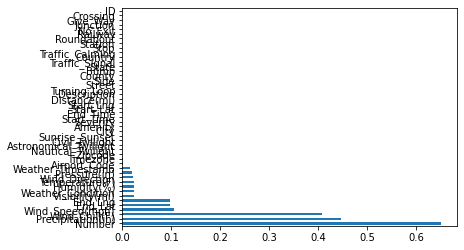

In [ ]:
missing_percentage.plot(kind = "barh")

since its not understandable because it also contains those index values that are = 0,we need to filter our series containing only missing percentages values

In [ ]:
missing_percentage[missing_percentage > 0]

Number                   6.505828e-01
Precipitation(in)        4.474069e-01
Wind_Chill(F)            4.071306e-01
Wind_Speed(mph)          1.057017e-01
End_Lat                  9.748044e-02
End_Lng                  9.748044e-02
Visibility(mi)           2.478449e-02
Weather_Condition        2.471606e-02
Humidity(%)              2.449822e-02
Temperature(F)           2.309458e-02
Wind_Direction           2.177661e-02
Pressure(in)             1.956327e-02
Weather_Timestamp        1.611397e-02
Airport_Code             2.248339e-03
Timezone                 1.179542e-03
Zipcode                  3.766386e-04
Nautical_Twilight        4.074592e-05
Astronomical_Twilight    4.074592e-05
Civil_Twilight           4.074592e-05
Sunrise_Sunset           4.074592e-05
City                     4.022354e-05
Amenity                  5.223836e-07
Severity                 5.223836e-07
Start_Time               5.223836e-07
End_Time                 5.223836e-07
Start_Lat                5.223836e-07
Start_Lng   

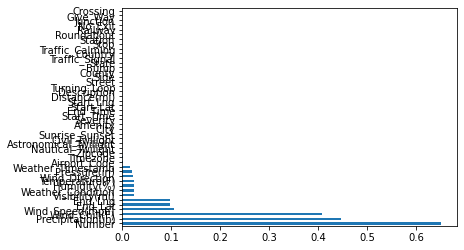

In [ ]:
missing_percentage[missing_percentage > 0].plot(kind='barh')

very high percentage of missing values can be skipped since those are not valuable enough for accidents
either dont consider those highly missing values columns or you can drop those unuseful columns

we will consider only those columns having no null values or least null values

##Exploratory Analysis and Visualisation

looking and analysing some of the columns using graphs

Columns we'll analyse:


1.   City
2.   Start Time
3.   Start Lat, start Lng
4.   Temperature
5.  Weather Condition





In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.City

0               Greenville
1                Charlotte
2                Los Gatos
3              Carson City
4          Fort Lauderdale
                ...       
1387917             Mastic
1387918        Mill Valley
1387919      Oklahoma City
1387920             Denver
1387921                NaN
Name: City, Length: 1387922, dtype: object

In [ ]:
cities=df.City.unique()
len(df.City.unique())

11179

since we cant analyze each and every accidents ina city,so we cant count number of cities by accidents,since each row represents accidents,so we will sum up all accidents for each cities individually.

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles    45220
Houston        44856
Charlotte      37101
Miami          32888
Dallas         31884
               ...  
Ware               1
Kinsale            1
Lacon              1
Pennville          1
Levelland          1
Name: City, Length: 11178, dtype: int64

In [ ]:
cities_by_accidents[:10]

Los Angeles    45220
Houston        44856
Charlotte      37101
Miami          32888
Dallas         31884
Austin         25521
Raleigh        20672
Atlanta        19283
Sacramento     19099
Orlando        18443
Name: City, dtype: int64

since new york is highest populated city but its not showing as in accidents in above
so,lets check if new york is present in our Dataframe or not.

In [ ]:
"City" in df["City"]

False

In [ ]:
"Los Angeles" in df["City"]

False

In [ ]:
"City" in df.City

False

In [ ]:
df.City

0               Greenville
1                Charlotte
2                Los Gatos
3              Carson City
4          Fort Lauderdale
                ...       
1914297             Reston
1914298             Layton
1914299         Sun Valley
1914300           Richmond
1914301                NaN
Name: City, Length: 1914302, dtype: object

In [ ]:
"New York" in df.City.values

True

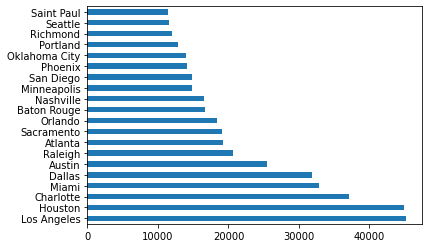

In [ ]:
cities_by_accidents[:20].plot(kind="barh")

In [ ]:
high_accidents_cities= cities_by_accidents[cities_by_accidents >=1000]
low_accidents_cities= cities_by_accidents[cities_by_accidents <1000]

In [ ]:
len(high_accidents_cities)

293

In [ ]:
df.City.count()

1914225

In [ ]:
len(high_accidents_cities) / len(cities)
#% of high accident cities

0.02620985776903122

#Visualisation

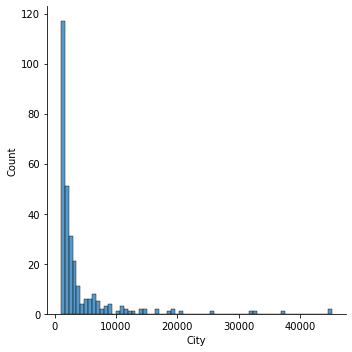

In [ ]:
import seaborn as sns
sns.displot(high_accidents_cities)

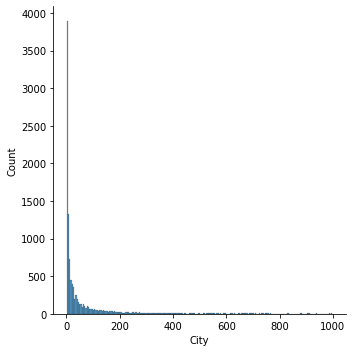

In [ ]:
sns.displot(low_accidents_cities)

In [ ]:
cities_by_accidents[cities_by_accidents == 1]

Fyffe             1
Driggs            1
West Townshend    1
Midfield          1
Townshend         1
                 ..
Ware              1
Kinsale           1
Lacon             1
Pennville         1
Levelland         1
Name: City, Length: 1489, dtype: int64

#OR

In [ ]:
low_accidents_cities[low_accidents_cities ==1]

Fyffe             1
Driggs            1
West Townshend    1
Midfield          1
Townshend         1
                 ..
Ware              1
Kinsale           1
Lacon             1
Pennville         1
Levelland         1
Name: City, Length: 1489, dtype: int64

In [ ]:
len(low_accidents_cities)

10885

In [ ]:
low_accidents_cities

Milpitas     998
San Pablo    998
Paramount    995
Fullerton    994
Spokane      989
            ... 
Ware           1
Kinsale        1
Lacon          1
Pennville      1
Levelland      1
Name: City, Length: 10885, dtype: int64

In [ ]:
low_accidents_cities["Woodbridge"]

KeyError: ignored

In [ ]:
cities_by_accidents["New York"]

4807

In [ ]:
cities_by_accidents

Los Angeles    45220
Houston        44856
Charlotte      37101
Miami          32888
Dallas         31884
               ...  
Ware               1
Kinsale            1
Lacon              1
Pennville          1
Levelland          1
Name: City, Length: 11178, dtype: int64

In [ ]:
low_accidents_cities

Milpitas     998
San Pablo    998
Paramount    995
Fullerton    994
Spokane      989
            ... 
Ware           1
Kinsale        1
Lacon          1
Pennville      1
Levelland      1
Name: City, Length: 10885, dtype: int64

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cities

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Peconic',
       'Farmerville', 'Grand Cane'], dtype=object)

#working with "Start time" column

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
1914297    2020-11-21 01:47:52
1914298    2020-01-31 16:38:00
1914299    2018-05-08 12:17:02
1914300    2020-11-12 17:44:19
1914301                    NaN
Name: Start_Time, Length: 1914302, dtype: object

In [ ]:
type(df.Start_Time[0])

str

need to change from str to datetime stamp

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
1914297   2020-11-21 01:47:52
1914298   2020-01-31 16:38:00
1914299   2018-05-08 12:17:02
1914300   2020-11-12 17:44:19
1914301                   NaT
Name: Start_Time, Length: 1914302, dtype: datetime64[ns]

In [ ]:
type(df.Start_Time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

we cannot plot anything particular regarding timestamp,better to pullout hour from timestamp

In [ ]:
df.Start_Time.dt.hour 

0           8.0
1          17.0
2          21.0
3          16.0
4          17.0
           ... 
1914297     1.0
1914298    16.0
1914299    12.0
1914300    17.0
1914301     NaN
Name: Start_Time, Length: 1914302, dtype: float64

now lets analyse the new Start_Time column

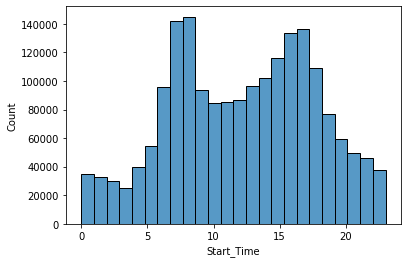

In [ ]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

In [ ]:
df.Start_Time.dt.hour.value_counts()
#getting count of each hours in accidents

8.0     144967
7.0     141773
17.0    136116
16.0    133286
15.0    116464
18.0    109462
14.0    102095
13.0     96214
6.0      95927
9.0      93935
12.0     86836
11.0     85085
10.0     84953
19.0     77114
20.0     59583
5.0      54484
21.0     49336
22.0     46064
4.0      39846
23.0     37517
0.0      35212
1.0      32706
2.0      29996
3.0      25330
Name: Start_Time, dtype: int64

In [ ]:
#getting percentage of occuring of each hours in accidents
df.Start_Time.dt.hour.value_counts() / len(df)

8.0     0.075728
7.0     0.074060
17.0    0.071105
16.0    0.069626
15.0    0.060839
18.0    0.057181
14.0    0.053333
13.0    0.050261
6.0     0.050111
9.0     0.049070
12.0    0.045362
11.0    0.044447
10.0    0.044378
19.0    0.040283
20.0    0.031125
5.0     0.028462
21.0    0.025772
22.0    0.024063
4.0     0.020815
23.0    0.019598
0.0     0.018394
1.0     0.017085
2.0     0.015669
3.0     0.013232
Name: Start_Time, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


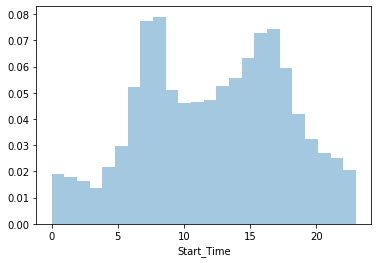

In [ ]:
#plotting percentage of accidents according to hours 
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

most accidents happened around 7pm and 8pm,because maybe rush hour for working professionals and also while returning from offices around 3pm to 6pm

###now checking for count of accidents in a day of week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


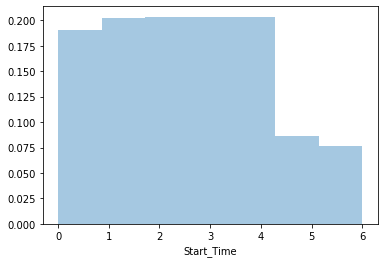

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

most accidents occur in weekdays compared to weekends

In [ ]:
df.Start_Time[df.Start_Time.dt.dayofweek == 6]

2         2020-12-13 21:53:00
45        2019-12-15 13:47:00
79        2019-06-30 10:21:30
81        2017-05-07 15:44:45
85        2020-10-18 10:26:01
                  ...        
1914204   2018-04-29 12:06:05
1914221   2020-10-25 20:46:00
1914224   2020-12-20 17:20:00
1914269   2019-08-18 17:32:12
1914285   2016-12-11 16:57:36
Name: Start_Time, Length: 126348, dtype: datetime64[ns]

In [ ]:
sundays=df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sundays

2         2020-12-13 21:53:00
45        2019-12-15 13:47:00
79        2019-06-30 10:21:30
81        2017-05-07 15:44:45
85        2020-10-18 10:26:01
                  ...        
1914204   2018-04-29 12:06:05
1914221   2020-10-25 20:46:00
1914224   2020-12-20 17:20:00
1914269   2019-08-18 17:32:12
1914285   2016-12-11 16:57:36
Name: Start_Time, Length: 126348, dtype: datetime64[ns]

In [ ]:
sundays.dt.hour

2          21
45         13
79         10
81         15
85         10
           ..
1914204    12
1914221    20
1914224    17
1914269    17
1914285    16
Name: Start_Time, Length: 126348, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


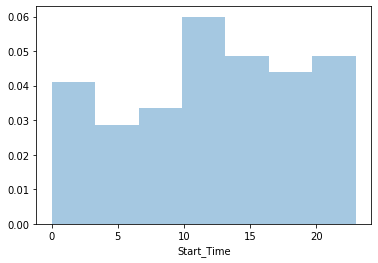

In [ ]:
sns.distplot(sundays.dt.hour,bins=7,kde=False,norm_hist=True)

so most accidents on sundays are around 10 am to 12 pm,maybe because people wakes up late and move out with their vehicle)

###saturdays

In [ ]:
saturdays=df.Start_Time[df.Start_Time.dt.dayofweek == 5]
saturdays

7         2019-12-21 23:59:00
16        2016-07-09 14:54:01
17        2020-11-21 16:32:00
19        2020-04-18 14:41:08
20        2020-08-22 16:19:52
                  ...        
1914263   2020-11-14 03:34:00
1914290   2020-05-23 12:50:43
1914293   2020-04-04 12:38:00
1914296   2020-09-12 19:51:34
1914297   2020-11-21 01:47:52
Name: Start_Time, Length: 142272, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


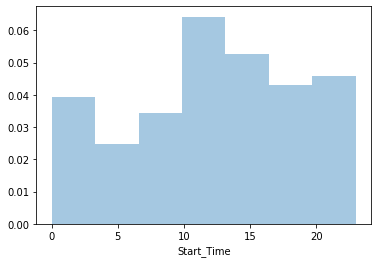

In [ ]:
sns.distplot(saturdays.dt.hour,bins=7,kde=False,norm_hist=True)

###Most accidents on which particular months

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


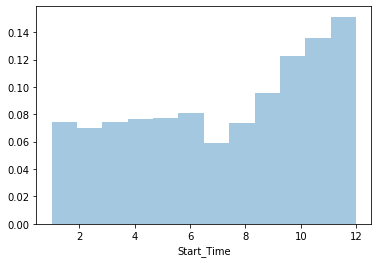

In [ ]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

most accidents occur around year ends

##accident analysis year wise

In [ ]:
accidents_2016=df.Start_Time[df.Start_Time.dt.year == 2016]

In [ ]:
accidents_2016

4         2016-08-31 17:40:49
16        2016-07-09 14:54:01
35        2016-07-08 12:38:55
43        2016-12-29 07:35:34
57        2016-05-20 17:23:00
                  ...        
1914227   2016-11-10 18:50:07
1914250   2016-12-19 06:46:30
1914273   2016-12-28 10:11:13
1914285   2016-12-11 16:57:36
1914294   2016-06-28 08:19:40
Name: Start_Time, Length: 177928, dtype: datetime64[ns]

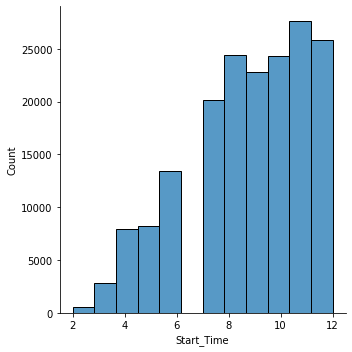

In [ ]:
accidents_2016=df.Start_Time[df.Start_Time.dt.year == 2016]
sns.displot(accidents_2016.dt.month,bins=12,kde=False)

In [ ]:
df.Start_Time[accidents_2016.dt.month].dt.month ==7

8     False
7     False
7     False
12    False
5     False
      ...  
11    False
12    False
12    False
12    False
6     False
Name: Start_Time, Length: 177928, dtype: bool

In [ ]:
accidents_2016.dt.month

4           8
16          7
35          7
43         12
57          5
           ..
1914227    11
1914250    12
1914273    12
1914285    12
1914294     6
Name: Start_Time, Length: 177928, dtype: int64

In [ ]:
accidents_2016=df.Start_Time[df.Start_Time.dt.year== 2016]

In [ ]:
accidents_2016

4         2016-08-31 17:40:49
16        2016-07-09 14:54:01
35        2016-07-08 12:38:55
43        2016-12-29 07:35:34
57        2016-05-20 17:23:00
                  ...        
1914227   2016-11-10 18:50:07
1914250   2016-12-19 06:46:30
1914273   2016-12-28 10:11:13
1914285   2016-12-11 16:57:36
1914294   2016-06-28 08:19:40
Name: Start_Time, Length: 177928, dtype: datetime64[ns]

#considering columns Start Latitude and Start Longitude

In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
1914297    38.950985
1914298    41.066780
1914299    34.227380
1914300    37.601169
1914301          NaN
Name: Start_Lat, Length: 1914302, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
1914297    -77.349189
1914298   -111.969950
1914299   -118.410620
1914300    -77.419313
1914301           NaN
Name: Start_Lng, Length: 1914302, dtype: float64

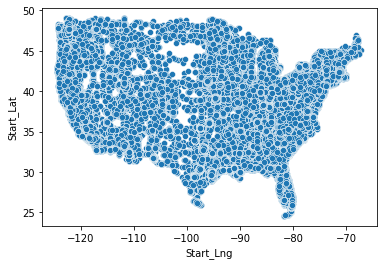

In [ ]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

decreasing number of plots

In [ ]:
sample_df=df.sample(int(0.1 * len(df)))

In [ ]:
sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
158611,A-158612,2.0,2019-08-30 20:37:00,2019-08-30 21:15:00,44.716967,-121.173630,44.708050,-121.167200,0.692,At NW Fir Ln - Accident.,5589.0,NW Columbia Dr,R,Madras,Jefferson,OR,97741-8918,US,US/Pacific,KRDM,2019-08-30 20:56:00,76.0,76.0,43.0,26.84,10.0,NW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
679229,A-679230,2.0,2017-05-22 12:59:34,2017-05-22 13:29:23,32.789993,-96.765701,NaN,NaN,0.020,Accident on Carroll Ave at Willow St.,4405.0,Willow St,L,Dallas,Dallas,TX,75226-1132,US,US/Central,KDAL,2017-05-22 12:53:00,75.9,NaN,56.0,30.02,10.0,East,5.8,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
806572,A-806573,4.0,2017-08-18 15:53:25,2017-08-18 21:53:25,42.909680,-76.196660,42.897510,-76.160870,1.997,Closed at Tully Farms Rd - Road closed due to ...,4600.0,US Route 20,R,La Fayette,Onondaga,NY,13084-9724,US,US/Eastern,KSYR,2017-08-18 15:54:00,87.1,NaN,53.0,29.68,10.0,Calm,NaN,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1252737,A-1252738,2.0,2017-02-02 19:08:17,2017-02-02 19:37:59,32.778500,-96.916443,NaN,NaN,0.010,Accident on Walton Walker Blvd Eastbound at Si...,NaN,Singleton Blvd,R,Dallas,Dallas,TX,75212,US,US/Central,KDAL,2017-02-02 18:53:00,46.0,40.6,51.0,30.32,10.0,NNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Day
1658075,A-1658076,2.0,2019-10-15 08:49:00,2019-10-15 09:40:18,38.763211,-121.258093,38.763211,-121.258093,0.000,At Taylor Rd - Accident.,NaN,I-80 E,R,Roseville,Placer,CA,95661,US,US/Pacific,KMCC,2019-10-15 08:50:00,54.0,54.0,47.0,29.98,10.0,CALM,0.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217353,A-1217354,4.0,2020-03-20 14:13:21,2020-03-20 15:13:21,39.704110,-105.342650,39.710050,-105.294700,2.582,Closed between CR-65/Exit 248 and Mt Vernon Cn...,NaN,I-70 E,R,Evergreen,Jefferson,CO,80439,US,US/Mountain,K0CO,2020-03-20 13:53:00,26.0,14.0,71.0,20.77,10.0,S,14.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1114617,A-1114618,2.0,2019-11-27 14:45:04,2019-11-27 15:59:44,35.449730,-97.618759,35.449730,-97.618759,0.000,Accident on 15th St at Macarthur Blvd.,1532.0,S MacArthur Blvd,L,Oklahoma City,Oklahoma,OK,73128-2413,US,US/Central,KOKC,2019-11-27 14:52:00,43.0,43.0,42.0,28.90,10.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
573299,A-573300,3.0,2018-10-31 17:50:26,2018-10-31 18:35:04,30.503799,-87.221664,30.503799,-87.221664,0.000,Accident on FL-291 Davis Hwy Northbound at I-1...,NaN,N Davis Hwy,R,Pensacola,Escambia,FL,32514,US,US/Central,KPNS,2018-10-31 17:53:00,75.0,NaN,82.0,30.00,10.0,ESE,9.2,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1095422,A-1095423,3.0,2017-10-21 22:18:24,2017-10-22 04:18:24,40.601990,-74.064490,40.608633,-74.038222,1.452,Between I-278/Verrazano-Narrows Brg and Verraz...,NaN,I-278 E,R,Staten Island,Richmond,NY,10305,US,US/Eastern,KEWR,2017-10-21 21:51:00,62.1,Na

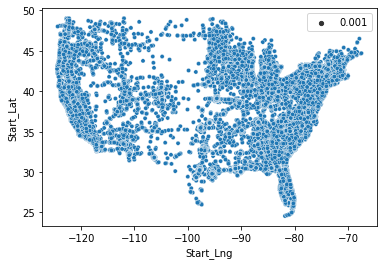

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

#plotiing latitude and longitude on a map

In [ ]:
import folium

In [ ]:
folium.Map()

lets plot one point on map

In [ ]:
latitude,longitude= df.Start_Lat[0],df.Start_Lng[0]

In [ ]:
latitude,longitude

(34.808868, -82.26915699999998)

now lets apply this marker to map nad plotting one accident

In [ ]:
map = folium.Map()#creating map
marker=folium.Marker((latitude, longitude))#creating marker
marker.add_to(map)#adding marker to map
map

since we plotted only one accidents,need to iterate over atleast some accidents and plot them accordingly

In [ ]:

for i,j in df.sample(10)[["Start_Lat","Start_Lng"]].iterrows():
  print(i,j)



1330336 Start_Lat     39.652580
Start_Lng   -104.831139
Name: 1330336, dtype: float64
1195286 Start_Lat    33.709265
Start_Lng   -84.498365
Name: 1195286, dtype: float64
1177353 Start_Lat     34.362198
Start_Lng   -118.555321
Name: 1177353, dtype: float64
642974 Start_Lat    25.883587
Start_Lng   -80.212606
Name: 642974, dtype: float64
13645 Start_Lat    40.820862
Start_Lng   -73.889793
Name: 13645, dtype: float64
318663 Start_Lat     33.460602
Start_Lng   -112.012779
Name: 318663, dtype: float64
1394871 Start_Lat    44.254892
Start_Lng   -86.319479
Name: 1394871, dtype: float64
1142144 Start_Lat    35.163101
Start_Lng   -80.889854
Name: 1142144, dtype: float64
649804 Start_Lat    37.693517
Start_Lng   -77.450478
Name: 649804, dtype: float64
266017 Start_Lat    37.687763
Start_Lng   -77.450867
Name: 266017, dtype: float64


based on density of accidents,need to show a heatmap

In [ ]:
from folium.plugins import HeatMap

need to create list of lat,long pairs like [[lat,long],[lat,long],[lat,long]] and then plot it on heatmap

In [ ]:
#creating a list of lat,long pairs:
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

[(34.808868, -82.26915699999998),
 (35.09008, -80.74556),
 (37.14573, -121.985052),
 (39.11039, -119.773781),
 (26.102942, -80.265091),
 (35.34824000000001, -80.84722099999998),
 (39.52397, -107.777),
 (34.034017, -118.026972),
 (35.86349000000001, -86.83168),
 (34.42633, -118.5851),
 (28.021709, -82.203583),
 (40.91221, -73.875099),
 (32.86693, -96.66617),
 (32.265141, -110.90358700000002),
 (41.05982, -74.25092),
 (29.723339000000006, -95.497337),
 (34.103172, -118.249969),
 (34.186595000000004, -117.439427),
 (42.501929, -82.918056),
 (41.556862, -73.779556),
 (33.918056, -84.33802800000002),
 (35.596561, -78.759743),
 (29.640491, -95.482445),
 (37.40691, -79.913933),
 (40.9122, -73.88461),
 (37.994461, -122.069885),
 (32.87109, -80.010628),
 (30.426109000000004, -97.753906),
 (33.774159000000004, -118.049783),
 (43.22039, -85.500961),
 (25.684458, -80.445924),
 (43.003693, -78.412064),
 (39.922646, -86.11689),
 (30.420996, -91.140549),
 (35.23932999999999, -80.856415),
 (35.05473, 

In [ ]:
sample_df= df.sample(int(0.001 * len(df)))
lat_long_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_long_pairs[0:100]).add_to(map)
map

##QUES. and ANS. Sections:


1.  more accidents in warmer areas or at colder areas?

2.  which states having high number of accidents?
3. which states are there conatining top 100 cities met with most accidents
4. what time of the day are most accidents frequent in?
5. which days of the weeks have most accidents?
6. which months has the most accidents?
7.what is the trend of accidents year over year(decreasing/increasing)
8. is the distribution of accidents by hours in weekends same as in that of weekdays.
9. (doubt)?? how to get graph plotting for a particular month of a particular year? for example 7th month of 2016 year



#Summary and Insights

1. percentage of high accident cities to total unique cities = 1.96%
2.New york with highest population in not present in top 10 high accident cities
3. most accidents happened around 7pm and 8pm,because maybe rush hour for working professionals and also while returning from offices around 3pm to 6pm
4. most accidents occur in weekdays compared to weekends
5. so most accidents on sundays are around 10 am to 12 pm,maybe because people wakes up late and move out with their vehicle)
6.most accidents occur around year ends
7. much data is missing for 2016 year